In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth



# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


# 시간 측정을 위한 시간 모듈
import datetime

# 주식정보
from pandas_datareader import data

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer


# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 출력창 청소를 위한 함수
from IPython.display import clear_output

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 다중 분류를 위한 원핫 인코딩
# 결과 데이터의 종류 수 만큼 결과 데이터의 칼럼을 늘리는 작업
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델을 읽어온다.
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 더 이상 성능 향상이 이루어지지 않는다면 조기 중단 시킬 수 있다.
from tensorflow.keras.callbacks import EarlyStopping

# 현재 프로젝트를 gpu에 할당한다.
# 컴퓨터의 GPU는 메모리를 가지고 있다. 
gpus = tf.config.experimental.list_physical_devices("GPU")
# gpu가 있다면
if len(gpus) >0 :
    try :
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
df1 = pd.read_csv("data/wine.csv", header=None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# 데이터 나누기
X = df1.drop(12, axis=1)
y = df1[12]


In [5]:
# 모델 가져오기
model = Sequential()

model.add(Dense(30, input_dim=12))
model.add(Activation("relu"))

model.add(Dense(12))
model.add(Activation("relu"))

model.add(Dense(8))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [6]:
# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
# 모델들이 저장될 위치
# epoch : 학습횟수
# val_loss : 검증 데이터의 손실률
path1 = 'models/20_와인 분류 - 종합/{epoch}-{val_loss}.hdf5'
path2 = "models/20_와인 분류 - 종합/최종.hdf5"

# 저장 콜백 설정
call1 = ModelCheckpoint(filepath=path1, monitor="val_loss", save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor="val_loss", save_best_only=True)

In [8]:
# 조기 중단
call3 = EarlyStopping(monitor="val_loss", patience=50)

In [9]:
# 테스트를 위해 학습과 검증으로 나눠서 한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=2000, batch_size=1000, callbacks=[call1, call2, call3]
                   )

Epoch 1/2000
5/5 [==============================] - 2s 95ms/step - loss: 0.5960 - accuracy: 0.6224 - val_loss: 0.4184 - val_accuracy: 0.7656
Epoch 2/2000
5/5 [==============================] - 0s 21ms/step - loss: 0.4152 - accuracy: 0.7541 - val_loss: 0.4069 - val_accuracy: 0.7677
Epoch 3/2000
5/5 [==============================] - 0s 19ms/step - loss: 0.4191 - accuracy: 0.7568 - val_loss: 0.3984 - val_accuracy: 0.7713
Epoch 4/2000
5/5 [==============================] - 0s 19ms/step - loss: 0.3998 - accuracy: 0.7640 - val_loss: 0.3677 - val_accuracy: 0.7836
Epoch 5/2000
5/5 [==============================] - 0s 19ms/step - loss: 0.3637 - accuracy: 0.7895 - val_loss: 0.3389 - val_accuracy: 0.8205
Epoch 6/2000
5/5 [==============================] - 0s 25ms/step - loss: 0.3348 - accuracy: 0.8399 - val_loss: 0.3252 - val_accuracy: 0.8703
Epoch 7/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.3206 - accuracy: 0.8839 - val_loss: 0.3137 - val_accuracy: 0.8923
Epoch 8/2000


Epoch 59/2000
5/5 [==============================] - 0s 23ms/step - loss: 0.1423 - accuracy: 0.9510 - val_loss: 0.1551 - val_accuracy: 0.9431
Epoch 60/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.1414 - accuracy: 0.9461 - val_loss: 0.1543 - val_accuracy: 0.9431
Epoch 61/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.1377 - accuracy: 0.9514 - val_loss: 0.1531 - val_accuracy: 0.9441
Epoch 62/2000
5/5 [==============================] - 0s 24ms/step - loss: 0.1354 - accuracy: 0.9492 - val_loss: 0.1523 - val_accuracy: 0.9451
Epoch 63/2000
5/5 [==============================] - 0s 22ms/step - loss: 0.1332 - accuracy: 0.9501 - val_loss: 0.1513 - val_accuracy: 0.9456
Epoch 64/2000
5/5 [==============================] - 0s 18ms/step - loss: 0.1322 - accuracy: 0.9505 - val_loss: 0.1502 - val_accuracy: 0.9441
Epoch 65/2000
5/5 [==============================] - 0s 20ms/step - loss: 0.1304 - accuracy: 0.9510 - val_loss: 0.1489 - val_accuracy: 0.9436
Epoch 

5/5 [==============================] - 0s 17ms/step - loss: 0.0857 - accuracy: 0.9754 - val_loss: 0.1111 - val_accuracy: 0.9667
Epoch 117/2000
5/5 [==============================] - 0s 16ms/step - loss: 0.0850 - accuracy: 0.9747 - val_loss: 0.1115 - val_accuracy: 0.9667
Epoch 118/2000
5/5 [==============================] - 0s 17ms/step - loss: 0.0841 - accuracy: 0.9751 - val_loss: 0.1102 - val_accuracy: 0.9662
Epoch 119/2000
5/5 [==============================] - 0s 19ms/step - loss: 0.0835 - accuracy: 0.9749 - val_loss: 0.1106 - val_accuracy: 0.9672
Epoch 120/2000
5/5 [==============================] - 0s 17ms/step - loss: 0.0829 - accuracy: 0.9758 - val_loss: 0.1085 - val_accuracy: 0.9682
Epoch 121/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.0827 - accuracy: 0.9756 - val_loss: 0.1089 - val_accuracy: 0.9672
Epoch 122/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.0815 - accuracy: 0.9749 - val_loss: 0.1127 - val_accuracy: 0.9646
Epoch 123/2000

5/5 [==============================] - 0s 17ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0956 - val_accuracy: 0.9728
Epoch 174/2000
5/5 [==============================] - 0s 18ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0949 - val_accuracy: 0.9723
Epoch 175/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.0928 - val_accuracy: 0.9764
Epoch 176/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0586 - accuracy: 0.9811 - val_loss: 0.0916 - val_accuracy: 0.9744
Epoch 177/2000
5/5 [==============================] - 0s 17ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0903 - val_accuracy: 0.9744
Epoch 178/2000
5/5 [==============================] - 0s 20ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0945 - val_accuracy: 0.9733
Epoch 179/2000
5/5 [==============================] - 0s 17ms/step - loss: 0.0580 - accuracy: 0.9802 - val_loss: 0.0902 - val_accuracy: 0.9759
Epoch 180/2000

5/5 [==============================] - 0s 24ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0862 - val_accuracy: 0.9764
Epoch 231/2000
5/5 [==============================] - 0s 17ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0855 - val_accuracy: 0.9764
Epoch 232/2000
5/5 [==============================] - 0s 18ms/step - loss: 0.0492 - accuracy: 0.9844 - val_loss: 0.0903 - val_accuracy: 0.9759
Epoch 233/2000
5/5 [==============================] - 0s 16ms/step - loss: 0.0506 - accuracy: 0.9828 - val_loss: 0.0946 - val_accuracy: 0.9733
Epoch 234/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.0494 - accuracy: 0.9839 - val_loss: 0.0860 - val_accuracy: 0.9790
Epoch 235/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0492 - accuracy: 0.9835 - val_loss: 0.0849 - val_accuracy: 0.9779
Epoch 236/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0480 - accuracy: 0.9842 - val_loss: 0.0935 - val_accuracy: 0.9708
Epoch 237/2000

5/5 [==============================] - 0s 17ms/step - loss: 0.0431 - accuracy: 0.9857 - val_loss: 0.0857 - val_accuracy: 0.9769
Epoch 288/2000
5/5 [==============================] - 0s 16ms/step - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.0840 - val_accuracy: 0.9790
Epoch 289/2000
5/5 [==============================] - 0s 19ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0842 - val_accuracy: 0.9769
Epoch 290/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0832 - val_accuracy: 0.9785
Epoch 291/2000
5/5 [==============================] - 0s 25ms/step - loss: 0.0428 - accuracy: 0.9859 - val_loss: 0.0844 - val_accuracy: 0.9785
Epoch 292/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0848 - val_accuracy: 0.9785
Epoch 293/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0429 - accuracy: 0.9848 - val_loss: 0.0837 - val_accuracy: 0.9774
Epoch 294/2000

5/5 [==============================] - 0s 18ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0976 - val_accuracy: 0.9759
Epoch 345/2000
5/5 [==============================] - 0s 21ms/step - loss: 0.0516 - accuracy: 0.9811 - val_loss: 0.0902 - val_accuracy: 0.9759
Epoch 346/2000
5/5 [==============================] - 0s 19ms/step - loss: 0.0439 - accuracy: 0.9855 - val_loss: 0.0853 - val_accuracy: 0.9785
Epoch 347/2000
5/5 [==============================] - 0s 18ms/step - loss: 0.0477 - accuracy: 0.9848 - val_loss: 0.0926 - val_accuracy: 0.9769
Epoch 348/2000
5/5 [==============================] - 0s 18ms/step - loss: 0.0472 - accuracy: 0.9844 - val_loss: 0.1024 - val_accuracy: 0.9718
Epoch 349/2000
5/5 [==============================] - 0s 19ms/step - loss: 0.0459 - accuracy: 0.9842 - val_loss: 0.0871 - val_accuracy: 0.9795
Epoch 350/2000
5/5 [==============================] - 0s 20ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0848 - val_accuracy: 0.9779
Epoch 351/2000

5/5 [==============================] - 0s 22ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0830 - val_accuracy: 0.9795
Epoch 402/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0372 - accuracy: 0.9877 - val_loss: 0.0855 - val_accuracy: 0.9774
Epoch 403/2000
5/5 [==============================] - 0s 21ms/step - loss: 0.0377 - accuracy: 0.9868 - val_loss: 0.0852 - val_accuracy: 0.9800
Epoch 404/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0383 - accuracy: 0.9855 - val_loss: 0.0915 - val_accuracy: 0.9769
Epoch 405/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0873 - val_accuracy: 0.9795
Epoch 406/2000
5/5 [==============================] - 0s 23ms/step - loss: 0.0408 - accuracy: 0.9861 - val_loss: 0.0847 - val_accuracy: 0.9769
Epoch 407/2000
5/5 [==============================] - 0s 23ms/step - loss: 0.0390 - accuracy: 0.9859 - val_loss: 0.0853 - val_accuracy: 0.9769
Epoch 408/2000

5/5 [==============================] - 0s 30ms/step - loss: 0.0363 - accuracy: 0.9868 - val_loss: 0.0858 - val_accuracy: 0.9774
Epoch 459/2000
5/5 [==============================] - 0s 22ms/step - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0826 - val_accuracy: 0.9805
Epoch 460/2000
5/5 [==============================] - 0s 25ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0817 - val_accuracy: 0.9800
Epoch 461/2000
5/5 [==============================] - 0s 23ms/step - loss: 0.0363 - accuracy: 0.9868 - val_loss: 0.0835 - val_accuracy: 0.9790
Epoch 462/2000
5/5 [==============================] - 0s 24ms/step - loss: 0.0355 - accuracy: 0.9875 - val_loss: 0.0819 - val_accuracy: 0.9800
Epoch 463/2000
5/5 [==============================] - 0s 20ms/step - loss: 0.0356 - accuracy: 0.9870 - val_loss: 0.0832 - val_accuracy: 0.9805
Epoch 464/2000
5/5 [==============================] - 0s 25ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0832 - val_accuracy: 0.9805
Epoch 465/2000

5/5 [==============================] - 0s 19ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0819 - val_accuracy: 0.9805
Epoch 516/2000
5/5 [==============================] - 0s 21ms/step - loss: 0.0346 - accuracy: 0.9879 - val_loss: 0.0862 - val_accuracy: 0.9805
Epoch 517/2000
5/5 [==============================] - 0s 18ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0838 - val_accuracy: 0.9815
Epoch 518/2000
5/5 [==============================] - 0s 18ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0844 - val_accuracy: 0.9800
Epoch 519/2000
5/5 [==============================] - 0s 19ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0832 - val_accuracy: 0.9815
Epoch 520/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0343 - accuracy: 0.9883 - val_loss: 0.0832 - val_accuracy: 0.9805
Epoch 521/2000
5/5 [==============================] - 0s 16ms/step - loss: 0.0347 - accuracy: 0.9883 - val_loss: 0.0847 - val_accuracy: 0.9795
Epoch 522/2000

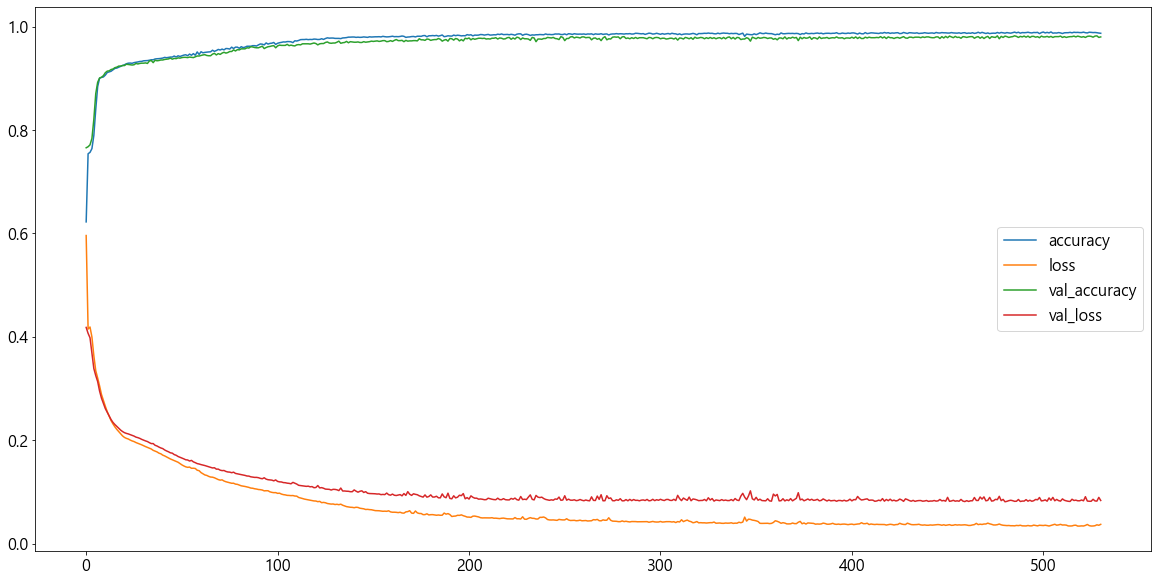

In [10]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [11]:
# 최종 모델
best_model = load_model(path2)
best_model

In [12]:
# 예측 결과를 추출한다.
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [13]:
# 진짜 결과와 비교를 한다.
r1 = accuracy_score(y_test, y_pred)
r1

0.9815384615384616